1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def p(t):
    return (1-2**(-t/(3.052*60)))


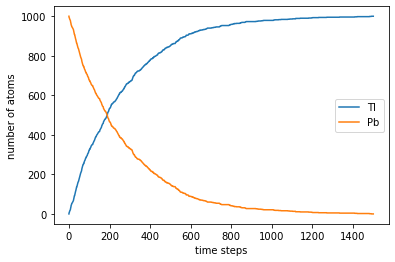

In [12]:
#number of atoms
n=1000
#probability of dacay for each atom
u = np.random.uniform(0, 1, n)

v=[]
for i in range(1500):
    a=u[u<p(i)]
    v.append(len(a))

x1 = np.linspace(0, len(v),len(v))
plt.plot(x1,v,label='Tl')
vv=[]
for j in v:
    vv.append(1000-j)
plt.plot(x1,vv,label='Pb')

plt.xlabel('time steps')
plt.ylabel('number of atoms')
plt.legend()

In [13]:
def p(t):
    return (2**(-t/(3.052*60)))*(np.log(2)/(3.052*60))

def cdfp(t):
    return 1 - np.exp2(-t/(3.052*60))

def icdfp(z):
    return -np.log2(1-z)*(3.052*60)

Text(0, 0.5, 'number of atoms')

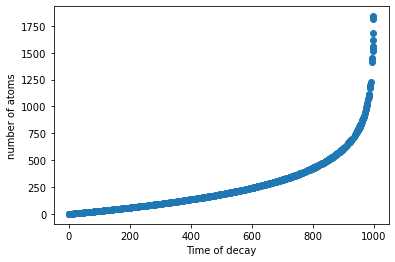

In [16]:
#icdfp is representing the times of decay of the 1000 Tl atoms
z=np.random.random(1000)
x=np.linspace(0,1,100)
plt.scatter(1000*z,icdfp(z))
plt.xlabel('Time of decay')
plt.ylabel('number of atoms')

Text(0, 0.5, 'number of atoms that not have decayed')

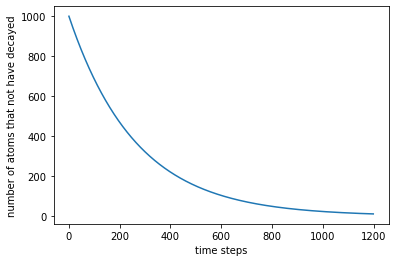

In [15]:
#Make a plot showing the number of atoms that have not decayed as a function of time
plt.plot(np.arange(1200),1000-(1000*cdfp(np.arange(1200))))
plt.xlabel('time steps')
plt.ylabel('number of atoms that not have decayed')

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [12]:
#uniform distribution for z
z=np.random.rand(10**6)
E=7.7*(10**6)*1.6*(10**(-19))
Z=79
eps=8.8*(10**(-12))
e=1.6*(10**(-19))
Tan_b=(Z*e**2)/(2*np.pi*eps*E)
#beam is represented by a 2D gaussian distribution so use Box_muller
a_0=5.29*10**(-11) #bohr radius (meter)
sigma=a_0/100
b=np.sqrt(-2*(sigma**2)*np.log(1-z))
Teta=2*np.arctan(Tan_b/b)
Mask_Teta=Teta[Teta>np.pi/2]
print('fraction of particles that "bounce back"',len(Mask_Teta)/10**6)

fraction of particles that "bounce back" 0.001529


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [26]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2
#x=np.linspace(0.001,1.999,1000)


In [27]:
from scipy.integrate import quad
true=quad(f,0,2)
true[0]

/tmp/ipykernel_2931/679177898.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  true=quad(f,0,2)


1.4516877509810684

In [28]:
# hit & miss
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print('estimate:',I)
err=true[0]-I
print('error:',np.abs(err/true[0]))


estimate: 1.45216
error: 0.0003253103283487454


In [29]:
#mean value method
x=2*np.random.random(100000)
I=2*np.sum(f(x))/100000
print('estimate:',I)
err=true[0]-I
print('error:',np.abs(err/true[0]))


estimate: 1.4486262803703598
error: 0.0021089043485003067


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [30]:
def f(x,y):
    if x**2+y**2<=1:
        return 1
    else:
        return 0
    print(n)


In [31]:
#2D
import math
D=2
m=0
for i in range(100000):
    m+=f(np.random.random(),np.random.random())
I=(2**D)*m/100000
print('estimate:',I)
true=(1/math.factorial(1))*np.pi**1
print('True value:',true)
err=true-I
print('error:',np.abs(err/true))

estimate: 3.14348
True value: 3.141592653589793
error: 0.000600761021022285


In [32]:
def f2(x):
    if np.sum(x**2)<=1:
        return 1
    else: 
        return 0


In [33]:
m2=0
D=10
for i in range(100000):
    m2+=f2(np.random.random((10)))
I=(2**D)*m2/100000
print('estimate:',I)
true=(1/math.factorial(5))*np.pi**5
print('True value:',true)
err=true-I
print('error:',np.abs(err/true))

estimate: 2.51904
True value: 2.550164039877345
error: 0.012204720712335863


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [35]:
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)
def w(x):
    return 1/x**(1/2)

In [36]:
integral_of_w_X=2*x**(1/2)
#integral_of_w_X[0,1]=2
m=0
for i in range(1000000):
    x=np.random.random()
    m+=f(x)/w(x)
I=(m*2)/1000000
print('estimate:',I)

estimate: 0.7597769800415882
